<a href="https://www.kaggle.com/code/razakmd/staff-requirement-predication?scriptVersionId=207205414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#my first ML project
# Based on population, predict the staff requirement
# condition 
# Upto 1000 - 2 employees required 
# 1001 -1499 - 3 employees required
# 1500 - 1999 -4 employees required 
# like every 500, 1 employee increment 

In [3]:
population = [1054,568,1798,758,574,2310,963,2948,120, 88, 1672,1654,1277,797,788,1366,3038,1895,683,1857,1784,510,1172,6042,3265,695,1390,1679,2665,1232,2486,1404,707,3123,1213,445,1893,6235,1008,1691,454,1065,2361,941,1921,1011,800,961,3909,3748,1611,633,2205,835,1427,1233,719,1597,3467,2355,517,1080,5432,3040,547,1354,2792,985,3927,2743,1843,3401,613,2777,6303,7401,1833,1904,902,2553,719,1239,1333,1324,365,529,587,1081,888,984,2927,1657,832,1157,573,3915,1024,1375,914,609,1324,689,805,500,1159,638,1335,934,1139,1160,828,1277,1274,1103,1212,3584,635,547,913,2016,3144,1775,1465,3953,2704,2674,1562,699,648,481,742,763,1288,1058,2287,1258,1211,1370,2291,4557,4341,1758,342,1810,1009,7470,697,3919,1256,1286,1122,927,4393,2156,3092,3871,622,820,1537,3690,1416,2825,1347,1378,2984,1839,1265,1825,771,834,1877,4137,2012,2575,1909,1519,616,770,2029,1523,2647,2114,794,1584,2342,793,1579,1890,1820,534,2472,1702,2241,2851,3934,2693,1222,2297,1579,3473,1477,3810,1288,938,1683,4653,2078,1030,1309,2399,941,9329,2735,1171,3154,3516,4257,887,695,730,740,973,3500,576,965,1508,3111,588,414,571,2246,1944,1973,1998,1533,757,898,4411,5591,1677,3657,1274,1042,838,1471,1713,703,538,4573,1967,1528,1844,1529,716,2494,1960,1193,1266,1404,2263,939,562,1505,672,3874,986,2476,2314]

In [4]:
#create dataframe
df = pd.DataFrame(population, columns = ['Population'])

In [5]:
#Create function to generate staff requirment columns by using np. where condition 
def staff_req(df):
    df['Staff_Requirement']= np.where(df['Population']<=1000,2, 2+np.ceil((df['Population']-1000)/500))
    return df

In [6]:
df= staff_req(df)

In [7]:
df

,Population,Staff_Requirement
0,1054,3.0
1,568,2.0
2,1798,4.0
3,758,2.0
4,574,2.0
...,...,...
263,672,2.0
264,3874,8.0
265,986,2.0
266,2476,5.0


In [8]:
df['Staff_Requirement'].value_counts()

Staff_Requirement
2.0     83
3.0     57
4.0     47
5.0     23
6.0     16
8.0     14
7.0     12
9.0      5
13.0     3
10.0     3
15.0     2
11.0     1
19.0     1
12.0     1
Name: count, dtype: int64

In [9]:
#import matplotlib library for visualization
import matplotlib.pyplot as plt

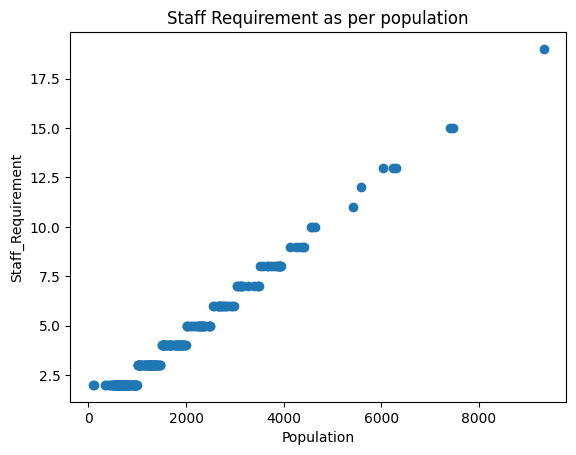

In [10]:
plt.scatter(x=df['Population'], y=df['Staff_Requirement'])
plt.xlabel('Population')
plt.ylabel('Staff_Requirement')
plt.title("Staff Requirement as per population")
plt.show()

In [11]:
#import training and testing libraries
from sklearn.model_selection import train_test_split

In [12]:
#split the data X, y 
X = df.drop(columns ='Staff_Requirement')
y = df.drop('Population',axis=1)

In [13]:
X.head()

,Population
0,1054
1,568
2,1798
3,758
4,574


In [14]:
y.head()

,Staff_Requirement
0,3.0
1,2.0
2,4.0
3,2.0
4,2.0


In [15]:
X.shape

(268, 1)

In [16]:
# X is a 1-dimensional , convert to array
X = np.array(X)

# Reshape X to have one column.This is useful when you have a single feature and need to convert it into a 2D array format.
X = X.reshape(-1, 1)


In [17]:
print(X)

[[1054]
 [ 568]
 [1798]
 [ 758]
 [ 574]
 [2310]
 [ 963]
 [2948]
 [ 120]
 [  88]
 [1672]
 [1654]
 [1277]
 [ 797]
 [ 788]
 [1366]
 [3038]
 [1895]
 [ 683]
 [1857]
 [1784]
 [ 510]
 [1172]
 [6042]
 [3265]
 [ 695]
 [1390]
 [1679]
 [2665]
 [1232]
 [2486]
 [1404]
 [ 707]
 [3123]
 [1213]
 [ 445]
 [1893]
 [6235]
 [1008]
 [1691]
 [ 454]
 [1065]
 [2361]
 [ 941]
 [1921]
 [1011]
 [ 800]
 [ 961]
 [3909]
 [3748]
 [1611]
 [ 633]
 [2205]
 [ 835]
 [1427]
 [1233]
 [ 719]
 [1597]
 [3467]
 [2355]
 [ 517]
 [1080]
 [5432]
 [3040]
 [ 547]
 [1354]
 [2792]
 [ 985]
 [3927]
 [2743]
 [1843]
 [3401]
 [ 613]
 [2777]
 [6303]
 [7401]
 [1833]
 [1904]
 [ 902]
 [2553]
 [ 719]
 [1239]
 [1333]
 [1324]
 [ 365]
 [ 529]
 [ 587]
 [1081]
 [ 888]
 [ 984]
 [2927]
 [1657]
 [ 832]
 [1157]
 [ 573]
 [3915]
 [1024]
 [1375]
 [ 914]
 [ 609]
 [1324]
 [ 689]
 [ 805]
 [ 500]
 [1159]
 [ 638]
 [1335]
 [ 934]
 [1139]
 [1160]
 [ 828]
 [1277]
 [1274]
 [1103]
 [1212]
 [3584]
 [ 635]
 [ 547]
 [ 913]
 [2016]
 [3144]
 [1775]
 [1465]
 [3953]
 [2704]


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=40)

In [19]:
#view the shape of data
print("X Train shape:", xtrain.shape)
print("X Test shape:", xtest.shape)
print("Y Train shape:", ytrain.shape)
print("y test shape:", ytest.shape)

X Train shape: (201, 1)
X Test shape: (67, 1)
Y Train shape: (201, 1)
y test shape: (67, 1)


In [20]:
#import model to predict
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(xtrain, ytrain)

LinearRegression()

In [23]:
model.intercept_

array([0.62088806])

In [24]:
model.coef_

array([[0.00194328]])

In [25]:
#linear regression y = ax +b (a : slope; b: intercept)

result =np.ceil((0.00194328 * 1024) +0.62088806)

In [26]:
print(result)

3.0


In [27]:
# predict the result
y_pred = model.predict(xtest).round()

In [28]:
#compare the predicted result with actual result
pd.DataFrame(np.c_[xtest, ytest, y_pred],columns =['Population', 'actual_staff_req', 'pred_staff_req'])

,Population,actual_staff_req,pred_staff_req
0,2297.0,5.0,5.0
1,683.0,2.0,2.0
2,1562.0,4.0,4.0
3,1309.0,3.0,3.0
4,800.0,2.0,2.0
...,...,...,...
62,2310.0,5.0,5.0
63,3123.0,7.0,7.0
64,927.0,2.0,2.0
65,588.0,2.0,2.0


In [29]:
# run the score
from sklearn.metrics import r2_score

In [30]:
r2_score(ytest, y_pred)

0.9838620879499003

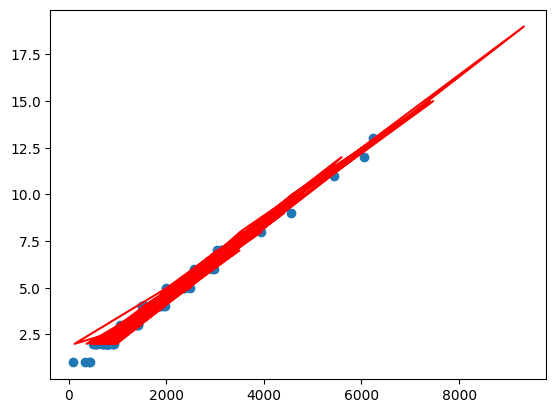

In [31]:
plt.scatter(xtest,y_pred)
plt.plot(xtrain, ytrain, c='red')

In [32]:
# save the ML 
import joblib

In [33]:
joblib.dump(model, "staff_req_predication_model.pkl")

['staff_req_predication_model.pkl']

In [34]:
pred_model =joblib.load('staff_req_predication_model.pkl')

In [35]:
np.ceil(pred_model.predict([[15255]])[0][0])

31.0

In [36]:
#Predicted result showing correctly 